In [90]:
import numpy as np
import matplotlib.pyplot as plt

plate_length = 50
max_iter_time = 10

alpha = 2
delta_x = 1

# Calculated params
delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2)

# Initialize solution: the grid of u(k, i, j)
u = np.empty((max_iter_time, plate_length, plate_length))

# Initial condition everywhere inside the grid
u_initial = 0.0

# Boundary conditions (fixed temperature)
u_top = 100.0
u_left = 0.0
u_bottom = 0.0
u_right = 0.0

# Set the initial condition
u.fill(u_initial)

# Set the boundary conditions
u[:, (plate_length-1):, :] = u_top
u[:, :, :1] = u_left
u[:, :1, 1:] = u_bottom
u[:, :, (plate_length-1):] = u_right

In [91]:
def calculate(u):
  for k in range(0, max_iter_time-1, 1):
    for i in range(1, plate_length-1, delta_x):
      for j in range(1, plate_length-1, delta_x):
        u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]
  
  return u

calculate(u)

array([[[  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        , 100.        , 100.        , ..., 100.        ,
         100.        ,   0.        ]],

       [[  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        ...,


ValueError: too many values to unpack (expected 2)

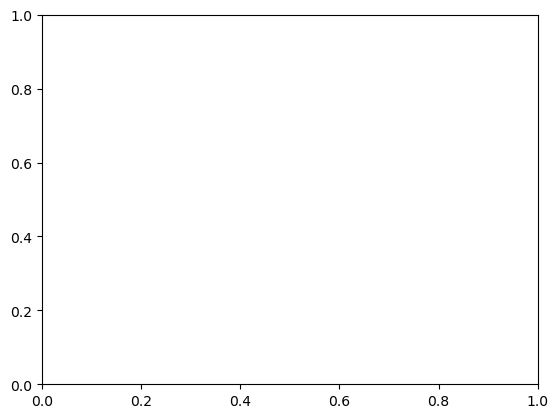

In [92]:

plt.pcolormesh(u.T, cmap=plt.cm.jet, vmin=0, vmax=100)
plt.title(f"Temperature evolution with time")
plt.xlabel("t")
plt.ylabel("x")
plt.colorbar()

# Allen-Cahn

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import trange

x_range = 1
time_range = 3
Nx = 100
Nt = 100000
delta_t = time_range/Nt
delta_x = x_range/Nx

epsilon = 0.03
gamma = (epsilon*delta_t) / (delta_x**2)

# Initialize solution
u = np.zeros((Nt, Nx))
u[:, 0] = 1
u[:, -1] = 1
for i in range(Nx):
    x = i*delta_x
    u[0, i] = 0.53*x + 0.47*np.sin(-1.5*np.pi*x)


def calculate(u):
  for k in trange(0, Nt-1):
    for i in range(1, Nx-1): 
        u[k + 1, i] = gamma * (u[k][i+1] - 2*u[k][i] + u[k][i-1]) + (delta_t+1)*u[k][i] - delta_t*u[k][i]**3
        #print(u[k + 1, i])
  return u

In [52]:
calculate(u)

  0%|          | 0/99999 [00:00<?, ?it/s]

array([[ 0.        , -0.01684003, -0.03363091, ...,  0.97941112,
         0.98731412,  0.99417824],
       [ 1.        , -0.01684009, -0.03363103, ...,  0.97940302,
         0.98730552,  1.        ],
       [ 1.        , -0.00784016, -0.03363116, ...,  0.97939492,
         0.9873494 ,  1.        ],
       ...,
       [ 1.        ,  0.99901971,  0.99804032, ...,  0.99864779,
         0.99932396,  1.        ],
       [ 1.        ,  0.99901977,  0.99804045, ...,  0.99864787,
         0.999324  ,  1.        ],
       [ 1.        ,  0.99901984,  0.99804059, ...,  0.99864795,
         0.99932404,  1.        ]])

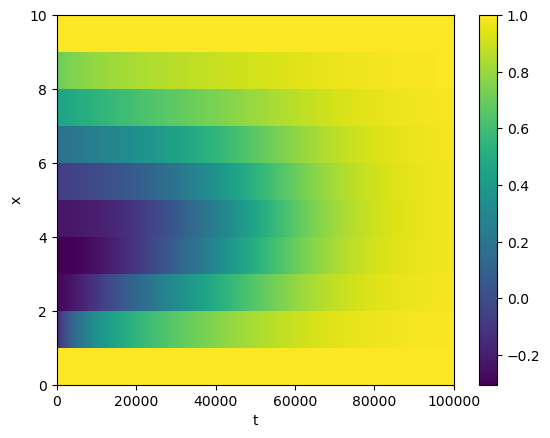

In [50]:
plt.pcolormesh(u[:, :].T, cmap='viridis')
plt.xlabel("t")
plt.ylabel("x")
plt.colorbar()

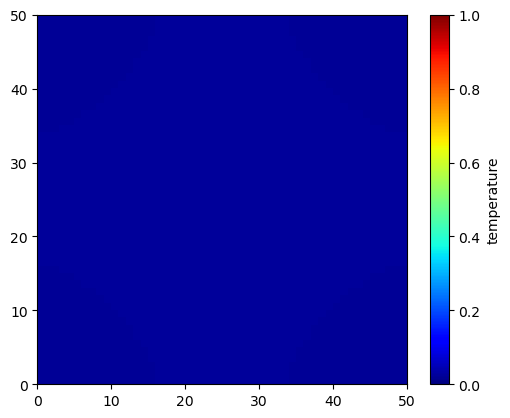

AttributeError: 'Matplotlib2DGridViewer' object has no attribute 'show'

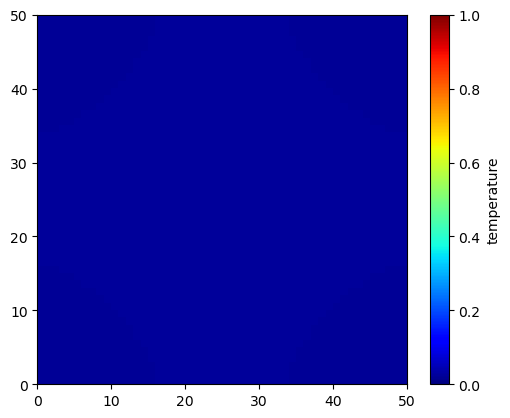

In [146]:
from fipy import Grid2D, CellVariable, DiffusionTerm, MatplotlibViewer, TransientTerm

# Define the mesh
nx, ny = 50, 50
dx, dy = 1.0, 1.0
mesh = Grid2D(dx=dx, dy=dy, nx=nx, ny=ny)

# Define the temperature variable with hasOld=True
temperature = CellVariable(name="temperature", mesh=mesh, value=0.0, hasOld=True)

# Set initial condition (a Gaussian distribution centered at the middle of the domain)
x, y = mesh.cellCenters
temperature.setValue(1.0, where=((x - nx * dx / 2.0)**2 + (y - ny * dy / 2.0)**2) < 20)

# Define the diffusion coefficients for x and y directions
diffusivity_x = 0.5
diffusivity_y = 2.0

# Define the heat equation with variable diffusion coefficients
eq = TransientTerm() == DiffusionTerm(coeff=diffusivity_x) + DiffusionTerm(coeff=diffusivity_y) + (0.0 * temperature)

# Set up the Matplotlib viewer to visualize the solution
viewer = MatplotlibViewer(vars=temperature, datamin=0, datamax=1.0)

# Time-stepping loop
timeStepDuration = 1.0  # time step size
totalTime = 100.0      # total simulation time
steps = int(totalTime / timeStepDuration)
    
for step in range(steps):
    temperature.updateOld()
    eq.solve(var=temperature, dt=timeStepDuration)

    # Update the Matplotlib plot at every 10 steps (adjust as needed)
    if step % 10 == 0:
        viewer.plot()

# Show the final solution
viewer.plot()


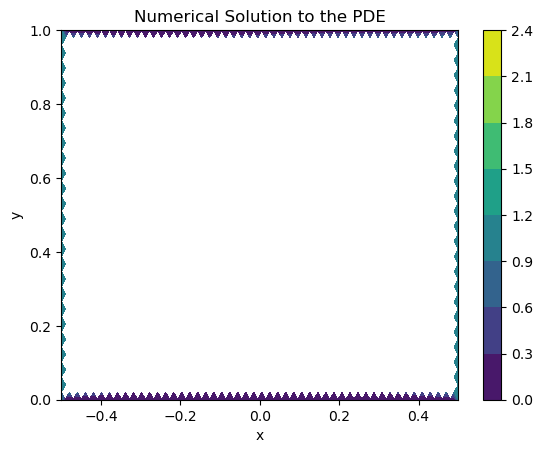

In [162]:
import numpy as np
import matplotlib.pyplot as plt

# Grid parameters
Nx = 100  # Number of grid points in the x direction
Ny = 50  # Number of grid points in the y direction
Lx = 1.0  # Length of the domain in the x direction
Ly = 1.0  # Length of the domain in the y direction
dx = Lx / (Nx - 1)  # Grid spacing in the x direction
dy = Ly / (Ny - 1)  # Grid spacing in the y direction

# Coefficients
k1 = 2.0
k2 = 0.1

# Initialize grid and set boundary conditions
u = np.empty((Nx, Ny))
u[:, 0] = 0  # u(x, 0) = 0
u[:, -1] = 0  # u(x, 1) = 0
u[0, :] = 1  # u(-0.5, y) = 1
u[-1, :] = 1  # u(0.5, y) = 1

# Jacobi iteration
num_iterations = 1000
for _ in range(num_iterations):
    u_new = np.copy(u)
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            u_new[i, j] = (k1 * (dy**2) * (u[i + 1, j] + u[i - 1, j])
                           + k2 * (dx**2) * (u[i, j + 1] + u[i, j - 1])) / (2 * (k1 * (dy**2) + k2 * (dx**2)))
    u = np.copy(u_new)

# Plot the solution
X, Y = np.meshgrid(np.linspace(-0.5, 0.5, Nx), np.linspace(0, 1, Ny))
plt.contourf(X, Y, u.T, cmap='viridis')
plt.colorbar()
plt.title('Numerical Solution to the PDE')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [166]:
from fipy import CellVariable, Grid2D, DiffusionTerm, TransientTerm, MatplotlibViewer

# Grid parameters
Nx = 50
Ny = 50
Lx = 1.0
Ly = 1.0
dx = Lx / Nx
dy = Ly / Ny

# Time parameters
timeStepDuration = 1e-3
steps = 1000

# Create a 2D grid
mesh = Grid2D(dx=dx, dy=dy, nx=Nx, ny=Ny)

# Create the variable for the solution
u = CellVariable(name="u", mesh=mesh, hasOld=True)

# Set the initial condition
u.setValue(0.0)

# Set the boundary conditions
u.constrain(1, where=mesh.facesTop | mesh.facesBottom)
u.constrain(0, where=mesh.facesLeft | mesh.facesRight)

# Define the PDE
eq = TransientTerm() == DiffusionTerm(coeff=k1, var=u) - DiffusionTerm(coeff=k2, var=u)

# Time-stepping loop
viewer = MatplotlibViewer(vars=u, datamin=0, datamax=1)
for step in range(steps):
    u.updateOld()
    eq.solve(var=u, dt=timeStepDuration)

    # Uncomment the following line if you want to visualize the solution at each step
    # viewer.plot()

# Display the final solution
viewer.plot()
input("Press Enter to exit...")


ExplicitVariableError: Terms with explicit Variables cannot mix with Terms with implicit Variables.